In [ ]:
#!pip install scikit-learn

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [9]:
image_path = r"../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

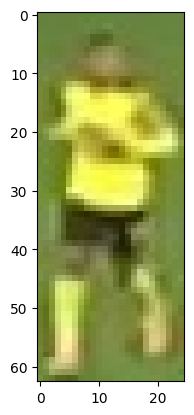

In [10]:
plt.imshow(image)

## Take top half of image

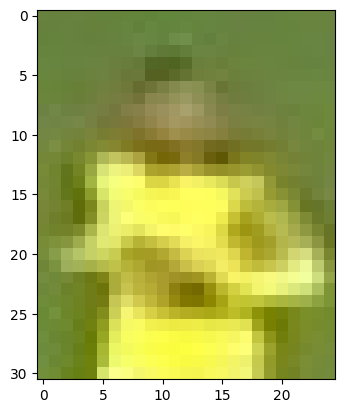

In [11]:
top_half_image = image[0 : int(image.shape[0]/2) , :]
plt.imshow(top_half_image)
plt.show()

## Cluster the image into two cluster

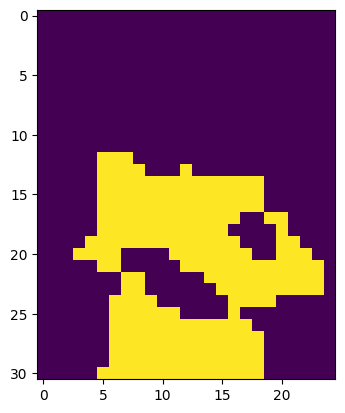

In [14]:
# Reshape the image into 2D array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster label
labels = kmeans.labels_

# reshape the labels into the original image
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# deploy the clustered image
plt.imshow(clustered_image)
plt.show() 

In [16]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count) 
print(non_player_cluster)

0


In [18]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [19]:
kmeans.cluster_centers_[player_cluster]

array([227.23873874, 228.36486486,  89.66216216])